In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Cópia de cursos-prouni.csv - cursos-prouni-2018-tratados.csv.csv')

In [5]:
list_drop_columns = ['grau',
                     'turno',
                     'curso_busca',
                     'curso_id',
                     'bolsa_parcial_ampla',
                     'bolsa_parcial_cotas',
                     'bolsa_integral_ampla',
                     'bolsa_integral_cotas',
                     'mensalidade',
                     'cidade_busca',
                     'uf_busca',
                    'universidade_nome',
                     ]

df_aux = df.drop(columns=list_drop_columns)

In [6]:
df_aux.head()

,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26
2,Medicina,741.06,729.02,730.98,722.82
3,Medicina,741.36,739.90,760.80,715.10
4,Medicina,756.46,737.88,747.14,717.60


ATRIBUTOS:

nome: Nome do curso

nota_integral_ampla: Nota da categoria de bolsa integral de ampla concorrência

nota_integral_cotas: Nota da categoria de bolsa integral com aplicação de cotas

nota_parcial_ampla: Nota da categoria de bolsa parcial de ampla concorrência

nota_parcial_cotas: Nota da categoria de bolsa parcial com aplicação de cotas



Exploração e tratamento dos dados

In [7]:
#alterando nomes das colunas
df_aux.head(2)

,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26


In [8]:
df_aux.rename(columns={'nome': 'nome_do_curso'}, inplace=True)

In [9]:
df_aux.head(3)

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26
2,Medicina,741.06,729.02,730.98,722.82


In [10]:
#valores NaN
#RELAÇÃO DA QUANTIDADE
df_aux.isnull().sum()

nome_do_curso          0
nota_integral_ampla    0
nota_integral_cotas    0
nota_parcial_ampla     0
nota_parcial_cotas     0
dtype: int64

In [11]:
#análise dos tipos de atributos
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df_aux.dtypes

nome_do_curso           object
nota_integral_ampla    float64
nota_integral_cotas    float64
nota_parcial_ampla     float64
nota_parcial_cotas     float64
dtype: object

In [12]:
#dados estatísticos
df_aux.describe()

,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
count,2203.000000,2203.000000,2203.000000,2203.000000
mean,599.380390,574.097921,547.297204,521.452964
std,53.194117,59.868058,58.971101,56.371352
min,450.000000,450.000000,450.000000,450.000000
25%,569.530000,542.290000,507.260000,450.000000
50%,602.040000,583.320000,555.240000,526.540000
75%,634.550000,614.340000,588.140000,563.600000
max,781.200000,792.240000,776.360000,768.340000


Análise dos Outliers

In [13]:
import plotly.express as px

In [14]:
boxplot = px.box(df_aux, y="nota_integral_ampla")
boxplot.show()

In [15]:
boxplot = px.box(df_aux, y="nota_integral_cotas")
boxplot.show()

In [16]:
boxplot = px.box(df_aux, y="nota_parcial_ampla")
boxplot.show()

In [17]:
boxplot = px.box(df_aux, y="nota_parcial_cotas")
boxplot.show()

Pré-processamento

In [18]:
df_aux.head(2)

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26


In [19]:
#excluir nome do curso
df2 = df_aux.drop(labels = 'nome_do_curso', axis = 1)

In [20]:
df2.head(2)

,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,739.62,738.08,738.96,718.64
1,758.32,723.94,734.92,711.26


Escalonamento

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [23]:
df2_esc

array([[ 2.63697298,  2.73967981,  3.25085185,  3.49879504],
       [ 2.98859543,  2.50344014,  3.18232816,  3.36784775],
       [ 2.66404979,  2.58831267,  3.11550061,  3.57296301],
       ...,
       [-1.91042663, -1.12469332, -0.65839058, -1.23624466],
       [-2.68361995, -2.07332759, -1.65028791, -1.26782816],
       [-1.24177988, -2.07332759, -1.65028791, -1.26782816]])

Agrupamento Hierárquico: Todos os atributos

In [24]:
df2_esc

array([[ 2.63697298,  2.73967981,  3.25085185,  3.49879504],
       [ 2.98859543,  2.50344014,  3.18232816,  3.36784775],
       [ 2.66404979,  2.58831267,  3.11550061,  3.57296301],
       ...,
       [-1.91042663, -1.12469332, -0.65839058, -1.23624466],
       [-2.68361995, -2.07332759, -1.65028791, -1.26782816],
       [-1.24177988, -2.07332759, -1.65028791, -1.26782816]])

In [25]:
df2_esc.shape

(2203, 4)

Dendograma

In [26]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

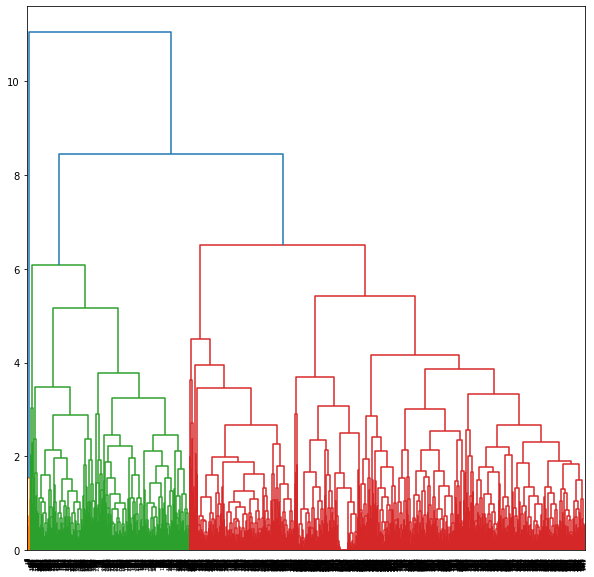

In [27]:
plt.figure(figsize=(10, 10))
dendrograma = dendrogram(linkage(df2_esc, method = 'complete')) #complete, single e ward (dados dispersos)

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
hier = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage = 'average')
classificacao = hier.fit_predict(df2_esc)

In [30]:
classificacao

array([3, 3, 3, ..., 4, 4, 4])

Agrupamento

In [31]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,3
1,3
2,3
3,3
4,3
...,...
2198,4
2199,4
2200,4
2201,4


In [32]:
df_hc = pd.concat([df_aux, agrupamento],axis=1)
df_hc

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
0,Medicina,739.62,738.08,738.96,718.64,3
1,Medicina,758.32,723.94,734.92,711.26,3
2,Medicina,741.06,729.02,730.98,722.82,3
3,Medicina,741.36,739.90,760.80,715.10,3
4,Medicina,756.46,737.88,747.14,717.60,3
...,...,...,...,...,...,...
2198,Teologia,584.34,450.00,489.28,450.00,4
2199,Teologia,450.00,450.00,450.00,450.00,4
2200,Pedagogia,497.78,506.78,508.48,451.78,4
2201,Gestão da Qualidade,456.66,450.00,450.00,450.00,4


In [33]:
df_hc.loc[df_aux.nome_do_curso == 'Teologia']

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
1112,Teologia,604.66,581.72,459.54,450.0,4
2187,Teologia,498.46,450.00,450.00,450.0,4
2195,Teologia,594.96,490.10,548.68,450.0,4
2196,Teologia,542.64,450.00,515.62,450.0,4
2197,Teologia,505.58,509.90,579.90,450.0,4
2198,Teologia,584.34,450.00,489.28,450.0,4
2199,Teologia,450.00,450.00,450.00,450.0,4


In [34]:
grupo = df_hc.loc[df_hc.Grupo == 6]
grupo.head(2)

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
1616,Logística,510.86,502.84,450.0,529.22,6
1667,Engenharia de Produção,560.18,519.76,557.4,636.72,6
